#               Amazon Sales Analysis

## ---------- Data PreProcessing ------------

In [1]:
## Import the libraries:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  import the dataset here by using "pd.read_csv()" function:-

In [2]:
df = pd.read_csv("Amazon Sales data.csv")

In [3]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [4]:
# columns name presents in dataframe.

df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
# inspect shape of the dataset:-

df.shape


(100, 14)

In [6]:
# check the number of missing values in each column

df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

as we can see we don't have any null or missing values in our dataset

In [7]:
# basic information to check the data type of the columns 
# and is there any null values are there or not.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
# changing the data types of date columns from object to "datetime"

df["Order Date"] = pd.to_datetime(df["Order Date"])


In [9]:
# adding the columns "Year" and "Month" from 'Order Date' Column:

df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

In [10]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


* by checking the dataframe we can see the 2 new columns [Month & Year]

In [11]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month'],
      dtype='object')

In [12]:
# let's check the region and how many regions are there in the dataset.

region = df["Region"].unique()
region

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [13]:
# number of region:

region = df["Region"].nunique()
print("Total Regions:", region)

Total Regions: 7


In [14]:
# check the unique contries and total count of the countries:-

countries = df["Country"].unique()
countries


array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [15]:
# total count of the countries:-

countries = df["Country"].nunique()
print("Total Countries:",countries)

Total Countries: 76


In [16]:
# check the "Item Type" column:-

Item_types = df["Item Type"].unique()
Item_types


array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [17]:
# total Items in the data set:-

Item_types = df["Item Type"].nunique()
print("Total Item types:", Item_types)


Total Item types: 12


In [18]:
# how many units are sold in the dataset:-

total_unit_sold = df["Units Sold"].sum()
print("Total Unit Sold:", total_unit_sold)

Total Unit Sold: 512871


In [19]:
# after total unit sold check the cost:-

total_unit_cost = df["Unit Cost"].sum()
print("Total Unit Cost:", total_unit_cost)

Total Unit Cost: 19104.8


In [20]:
# now check the "Revemue":

total_revenue = df["Total Revenue"].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 137348768.31


In [21]:
# calculate the "total cost"

total_cost = df["Total Cost"].sum()
print("Total Cost:", total_cost)

Total Cost: 93180569.91000001


In [22]:
# Calculate the Total Profit:-

total_profit = df["Total Profit"].sum()
print("Total Profit:", total_profit)

Total Profit: 44168198.39999999


In [23]:
# check the channels for saling:-

Sales_Channel = df["Sales Channel"].unique()
Sales_Channel

array(['Offline', 'Online'], dtype=object)

In [24]:
# now, let's check the "Total Profit"  'Region' wise via offline or online channel:-

df.groupby(['Region', 'Sales Channel'])["Total Profit"].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

### Conclusion:-

as we cunclude...

* 'Asia', 'Central America and the Caribbean', 'Europe', 'Sub-Saharan Africa' are getting more businees from Offline Channels.
* while "North America" is getting bussiness only from Offline Channels.
* other then regions are getting more business from online channels.
* so, Company should do more advertising, promotions for the Online Channels.

In [25]:
# Total value of all country

df["Country"].value_counts()

Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64

C:\Users\amita\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amita\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amita\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Total Revenue')

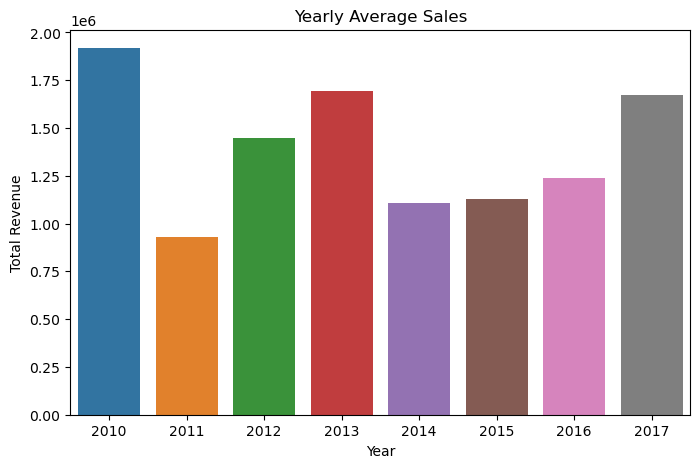

In [26]:
## Yearly sales:-

Year_sales = df.groupby('Year') ["Total Revenue"].mean()
plt.figure(figsize=(8,5))
sns.barplot(x= Year_sales.index, y = Year_sales.values)
plt.title("Yearly Average Sales")
plt.xlabel('Year')
plt.ylabel('Total Revenue')

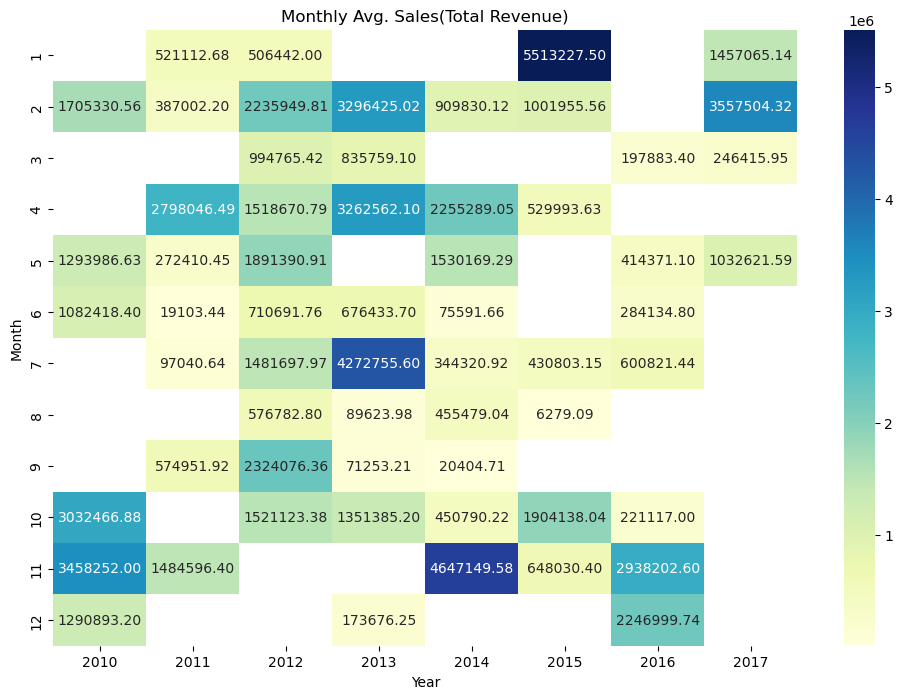

In [85]:
# We already have "Month" and "Year" columns..
# So, Calculating the "Monthly Avg. Sales":-
monthly_avg_sales = df.groupby(['Year','Month'])['Total Revenue'].mean().reset_index()

# Creating "Pivot table" for better visualization:-
pivot_table = monthly_avg_sales.pivot(index='Month', columns='Year', values='Total Revenue')

# Ploting "Heat map" for the Monthly Avg. Sales":- 
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt="0.2f", cmap="YlGnBu")
plt.title("Monthly Avg. Sales(Total Revenue)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

Based on the heatmap of monthly average sales (Total Revenue) from 2010 to 2017:

* High Sales Months:
    * October and November show consistently high sales, likely due to holiday shopping.
    * February 2017 and November 2016 had exceptionally high sales, indicating special events or successful campaigns.

* Low Sales Months:
    * June, July, August, and September generally have lower sales, possibly due to seasonal factors.

* Yearly Trends:
    * 2014 had significant peaks in April and December.
    * 2015-2017 show more balanced sales, indicating stable performance.

* Overall Growth:
    * There is a noticeable growth in sales from 2010 to 2017, reflecting an improving business trend.
    
These insights can aid in planning marketing campaigns and understanding consumer behavior.

In [27]:
# let's check revenue for all Items by using "Item Type" column:
# for that we should group all "Item Type"

Total_Revenue_Items = df.groupby("Item Type") ['Total Revenue'].sum()
Total_Revenue_Items

Item Type
Baby Food          10350327.60
Beverages           2690794.60
Cereal              5322898.90
Clothes             7787292.80
Cosmetics          36601509.60
Fruits               466481.34
Household          29889712.29
Meat                4503675.75
Office Supplies    30585380.07
Personal Care       3980904.84
Snacks              2080733.46
Vegetables          3089057.06
Name: Total Revenue, dtype: float64

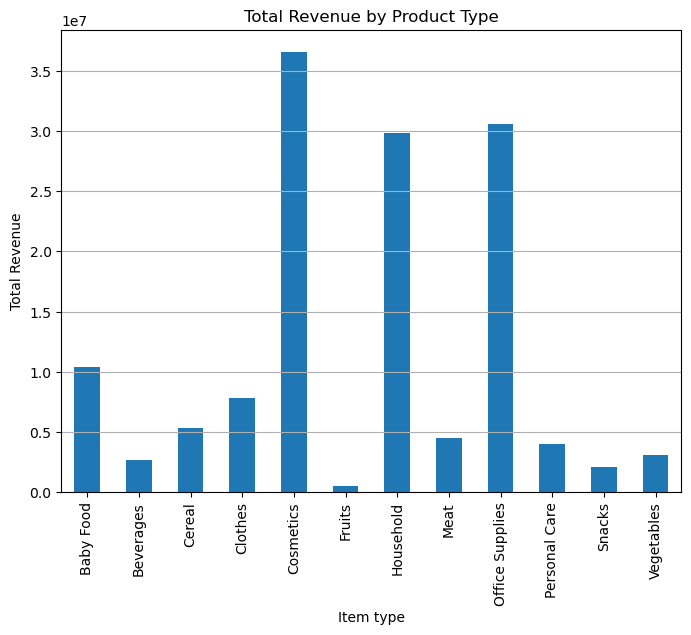

In [28]:
# Bar chart for total revenue by Item Type(Products):-

plt.figure(figsize=(8,6))
Total_Revenue_Items.plot(kind='bar')
plt.xlabel('Item type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Type')
plt.grid(axis='y')

* "Cosmetic" products are most sold out product and Amazon generates most of the revenue from it.
* "Office Supplies" , "Household" items are also most saling items on Amazon.
* but product like "fruits", "Snacks" , "Vegetables", "Beverages", etc. (mostly fresh edible items) are not so preferable items for the coustomer. so, for that we need some startegies like discount, fresh vegetables within 30-45 min. etc. to generate the more revenue.


In [29]:
# let's check "Sales Chanel"
# we will do group for "Sales Channel" by using groupby
Total_Revenue_Channel = df.groupby("Sales Channel") ['Total Revenue'].sum()
Total_Revenue_Channel

Sales Channel
Offline    79094809.20
Online     58253959.11
Name: Total Revenue, dtype: float64

Text(0.5, 1.0, 'Avg Revenue by Sales Channels')

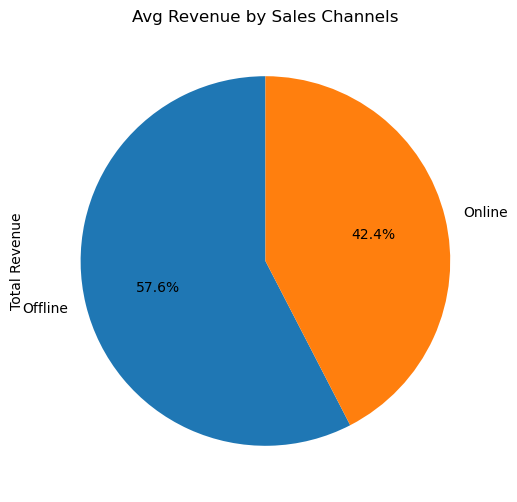

In [74]:
# calculate avg. Revenue by channels:-

plt.figure(figsize=(6,6))
avg_revenue_channel = df.groupby('Sales Channel') ['Total Revenue'].mean()
avg_revenue_channel.plot(kind='pie', autopct="%1.1f%%", startangle = 90)
plt.title('Avg Revenue by Sales Channels')

as we can see.. 
Consumer prefer offline channel more rather than online platform for the purchasing products.
* so, advrtising, discounts, coupons, coins etc. stretegies Amazon sales team should apply for onlinhe business.

In [65]:
# caluculating "Total Cost" by sales Channels:-

TotalCost_Channel = df.groupby('Sales Channel')['Total Cost'].sum()
TotalCost_Channel

Sales Channel
Offline    54174082.53
Online     39006487.38
Name: Total Cost, dtype: float64

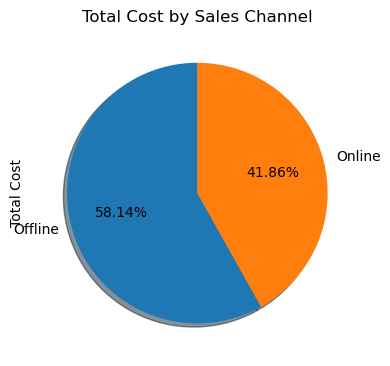

In [76]:
# creating 'pie chart' for "total Cost" by using 'Sales Channel':-

plt.figure(figsize=(4,4))
TotalCost_Channel.plot(kind='pie', 
                       autopct='%1.2f%%',
                       shadow=True, startangle=90)
plt.title ('Total Cost by Sales Channel')
plt.tight_layout()

offline sales make up a higher percentage of the total revenue than online sales. 
* Specifically, offline sales account for 58.14% of the total revenue, while online sales account for 41.86%.

In [69]:
# average profit region wise:-

avg_profit_region = df.groupby('Region')['Total Profit'].mean()
avg_profit_region

Region
Asia                                 555804.170000
Australia and Oceania                429287.275455
Central America and the Caribbean    406701.121429
Europe                               503769.937727
Middle East and North Africa         576119.186000
North America                        485980.920000
Sub-Saharan Africa                   338422.538889
Name: Total Profit, dtype: float64

Text(0.5, 1.0, 'Region wise Avg. Profit')

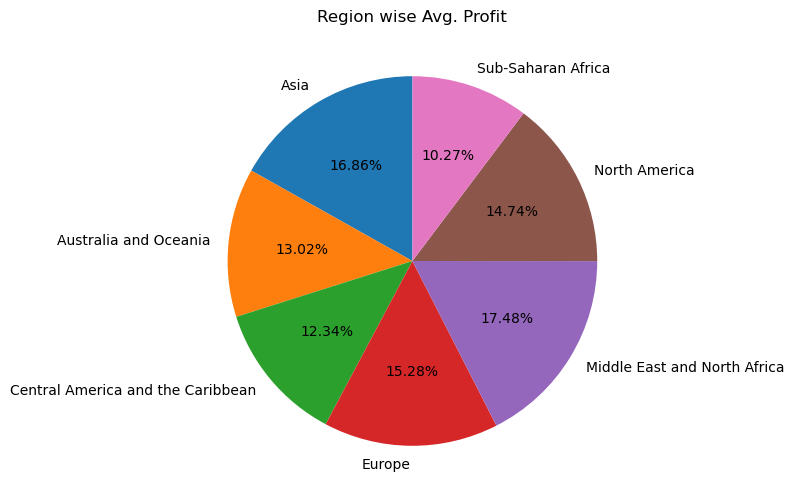

In [71]:
# creating pie chart for the avg. profit region wise:-

plt.figure(figsize=(8,6))
plt.pie(avg_profit_region, startangle=90, 
        labels=avg_profit_region.index,
       autopct='%1.2f%%')
plt.title("Region wise Avg. Profit")

* Middle East and North Africa: This region has the highest average profit, constituting 17.48% of the total average profit.
* Asia: Following closely, Asia has the second-highest average profit at 16.86%.
* Europe: Europe also shows a significant average profit, making up 15.28% of the total.
* Sub-Saharan Africa: This region has the lowest average profit, accounting for 10.27%.

#### Conclusion:-

* The Middle East and North Africa region is the most profitable, indicating strong sales performance or higher profit margins in this area.
* Asia and Europe also show high average profits, suggesting these are lucrative markets.
* Sub-Saharan Africa has the lowest average profit, which may point to either lower sales volumes or thinner profit margins in that region.

(-1.0999999530116766,
 1.0999990132545812,
 -1.0999995737000883,
 1.0999999797000042)

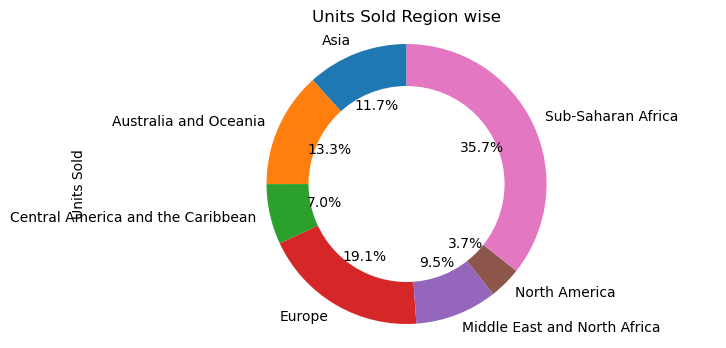

In [73]:
# calculate "unit sold" region wise:-
# creating donut chart for that:-

unit_sold_region = df.groupby("Region")['Units Sold'].sum()
plt.figure(figsize=(8,4))
unit_sold_region.plot(kind='pie', labels = unit_sold_region.index, autopct='%1.1f%%', startangle=90)

# create a circle at the center of the pie chart
cntr_circle = plt.Circle((0,0),(0.70), fc='white')
fig = plt.gcf()
fig.gca().add_artist(cntr_circle)

# Equal aspect ratio ensure that pie is drawn as circle:-
plt.title("Units Sold Region wise")
plt.axis('equal')

* High Sales Volume: Sub-Saharan Africa stands out with the highest sales volume, followed by Europe. These regions represent key markets for sales volume.
* Moderate Sales Volume: Australia and Oceania, Asia, and the Middle East and North Africa show moderate sales volumes, indicating significant market activity but with room for growth.
* Low Sales Volume: Central America and the Caribbean, along with North America, have the lowest sales volumes, indicating potential areas for improvement in market strategies.

In [41]:
# 'Unit Sold' on yearly basis..

unitSold_Yearly = df.groupby(['Year']) ['Units Sold'].sum()
unitSold_Yearly

Year
2010    61571
2011    54768
2012    97967
2013    64663
2014    92040
2015    49480
2016    43156
2017    49226
Name: Units Sold, dtype: int64

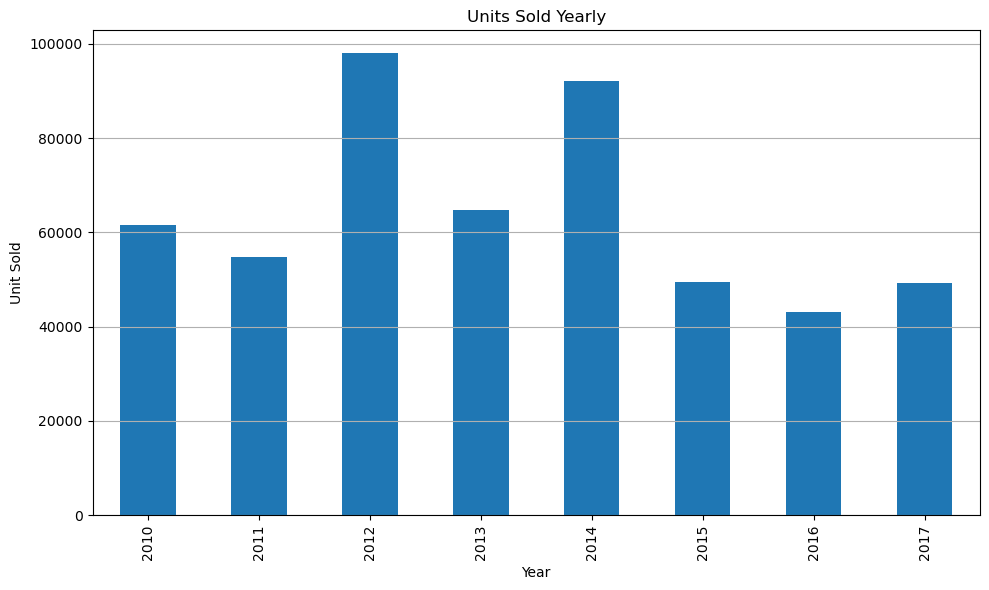

In [43]:
# Units Sold by Month and Year wise:-
# crearting Bar chart 

plt.figure(figsize=(10,6))
unitSold_Yearly.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Unit Sold")
plt.title("Units Sold Yearly")
plt.tight_layout()
plt.grid(axis='y')


* 2010: Approximately 60,000 units sold.This year shows a strong start in sales.
* 2011: Sales dropped to around 50,000 units.
* 2012: Significant increase to nearly 100,000 units sold.
* 2013: There was a notable drop compared to the peak in 2012.
* 2014: Another spike in sales to nearly 90,000 units, indicates a recovery and strong sales performance.
* 2015: Another year of decline following the previous spike.
* 2016: This is the lowest sales volume in the data set, indicating a concerning trend.
* 2017: Sales improved to around 60,000 units.


#### Conclusion:-

* The data shows a fluctuating trend in sales volumes over the years. 
* There were peaks in 2012 and 2014, while 2016 had the lowest sales. The overall trend indicates volatility, with significant year-to-year changes in sales volumes. 
* Strategies to stabilize and increase sales consistently over the years would be beneficial for business growth.







### Stretagies:-

* Focus on online sales: While offline sales generate more revenue currently, online sales have the potential for growth. Strategies like promotions and targeted advertising could be implemented to attract more customers to the online platform.
* Re-evaluate product strategies: Consider offering discounts or implementing fresh produce delivery initiatives to boost sales for categories like "fruits," "vegetables," and "beverages."
* Explore regional opportunities: The Middle East and North Africa show promise for high profits, while Central America and the Caribbean and North America have room for improvement in sales volume.
* Maintain sales consistency: Develop strategies to stabilize and increase sales volumes year-over-year to ensure steady business growth.


Overall, this EDA provides valuable insights into Amazon's sales performance. By addressing the identified areas for improvement, Amazon can optimize its sales strategies and increase profitability.